In [1]:
import pandas as pd

housing_data = pd.read_csv('housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


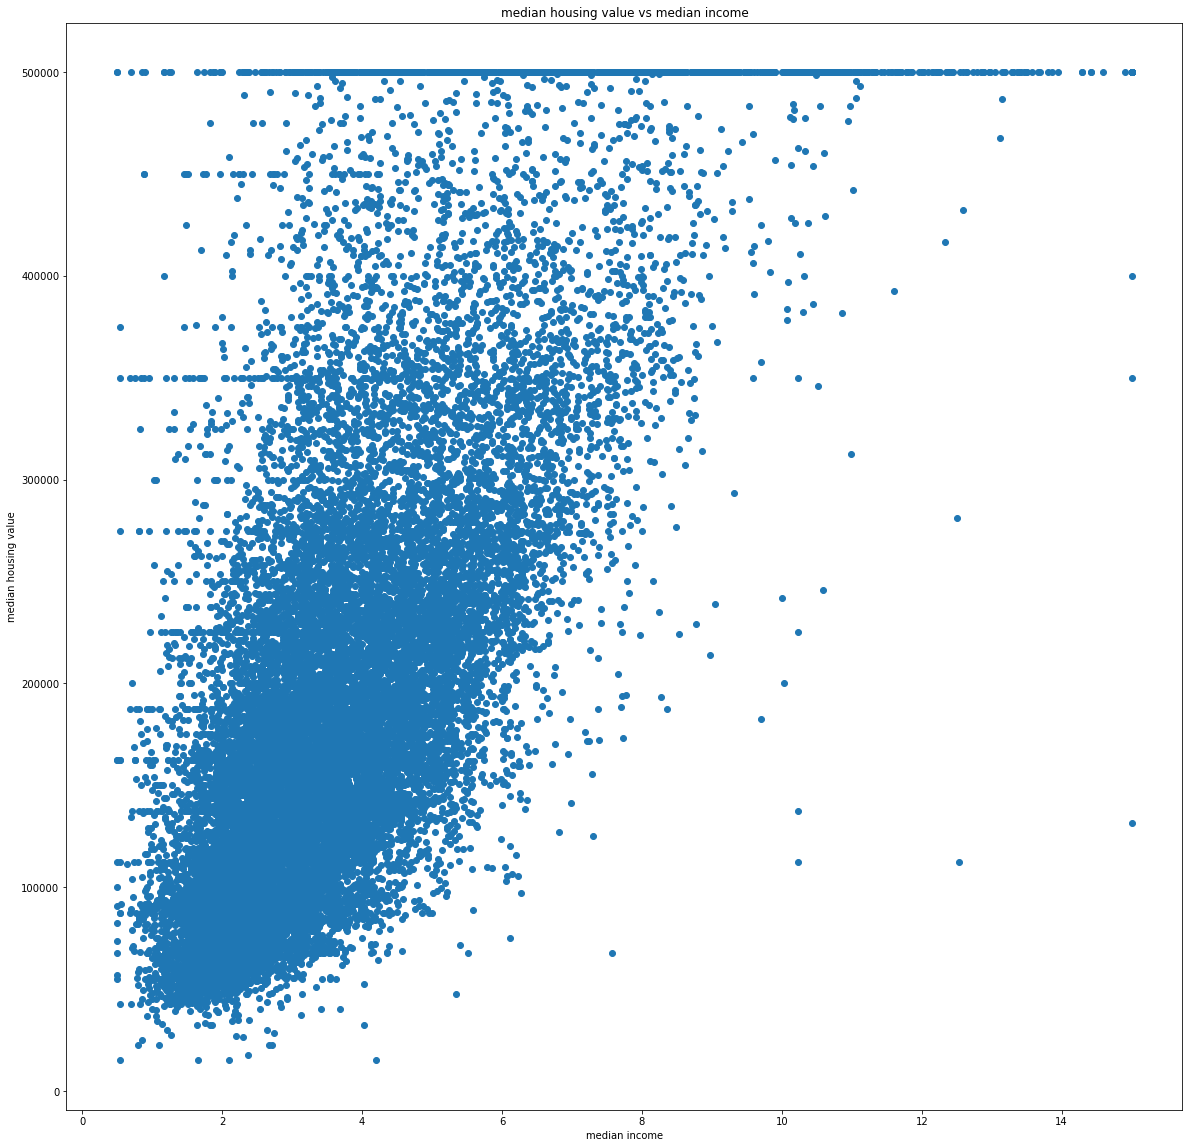

In [3]:
median_income = housing_data['median_income']
median_housing_value = housing_data['median_house_value']

median_data = housing_data[['median_house_value','median_income']]

#now let us plot this to visually see if there is a trend

import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
plt.ylabel('median housing value')
plt.xlabel('median income')
plt.title('median housing value vs median income')
plt.scatter(median_income, median_housing_value)


In [4]:
import numpy as np
import statsmodels.api as sm

In [5]:
x_ary = housing_data['median_income']
x_with_cnst = sm.add_constant(x_ary)
model = sm.OLS(housing_data['median_house_value'], x_with_cnst)
results = model.fit()
b,m = results.params
print(m)
print(b)

41793.849201896235
45085.5767032681


In [6]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:53:38   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.509e+04   1322.872     34.082

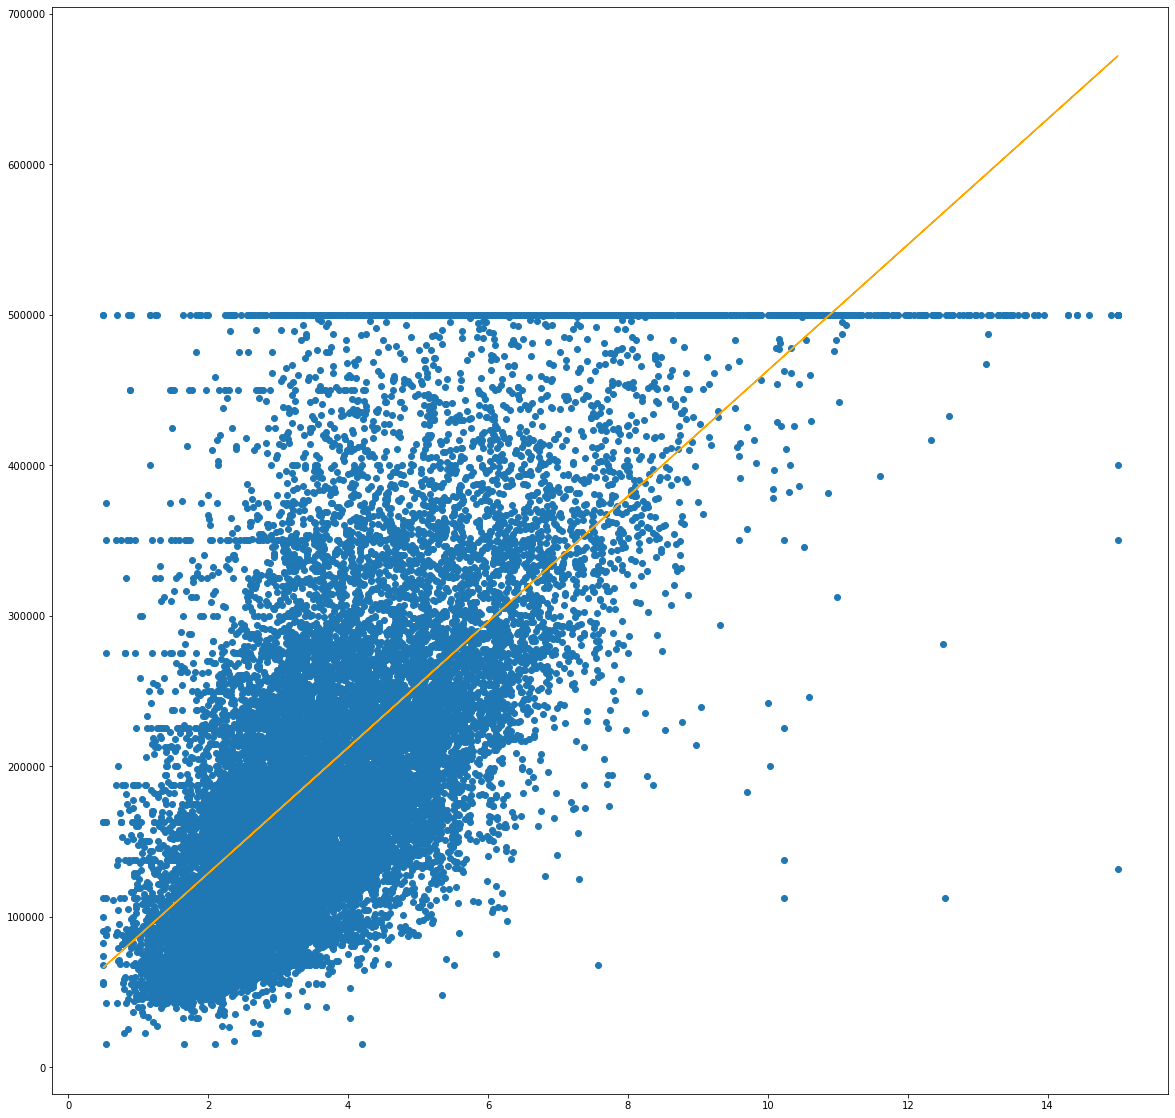

In [7]:
plt.figure(figsize = (20,20))
plt.scatter(housing_data['median_income'], housing_data['median_house_value'])
plt.plot(x_ary, m*x_ary+b, color='orange')